# Proyek Analisis Data: Bike Sharing Dataset
# **Nama:** [Your Name]
# **Email:** [Your Email]
# **ID Dicoding:** [Your Dicoding Username]


# Menentukan Pertanyaan Bisnis
# * Pertanyaan 1: Bagaimana pola penggunaan sepeda berdasarkan waktu (jam, hari, bulan, musim) dan faktor cuaca?
# * Pertanyaan 2: Apa perbedaan karakteristik antara pengguna casual dan registered dalam menggunakan layanan bike sharing?


In [1]:
# Import Semua Packages/Library yang Digunakan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from datetime import datetime
import calendar

In [2]:
# Data Wrangling
# Gathering Data
# Load dataset
day_df = pd.read_csv('./data/day.csv')
hour_df = pd.read_csv('./data/hour.csv')

In [3]:
# Display sample data
print("Daily Data Sample:")
day_df.head()

Daily Data Sample:


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


# **Insight:**
# * Dataset harian berisi 731 records yang merangkum aktivitas penyewaan sepeda per hari.
# * Dataset per jam berisi 17379 records yang merangkum aktivitas penyewaan sepeda per jam.

In [4]:
# Assessing Data
# Memeriksa informasi dataset
print("Daily Data Info:")
day_df.info()

Daily Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [5]:
print("\nHourly Data Info:")
hour_df.info()


Hourly Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [6]:
# Memeriksa statistik deskriptif
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [7]:
# Checking for missing values
print("Missing values in daily data:")
day_df.isnull().sum()

Missing values in daily data:


instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [8]:
print("Missing values in hourly data:")
hour_df.isnull().sum()

Missing values in hourly data:


instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

# **Insight:**
# * Tidak ada missing values pada kedua dataset
# * Terdapat beberapa kolom yang perlu dikonversi formatnya seperti tanggal (dteday)
# * Terdapat beberapa kolom kategorikal yang disimpan sebagai numerik (season, yr, mnth, holiday, weekday, workingday, weathersit)


In [ ]:
# Cleaning Data
# Convert dteday to datetime
day_df['dteday'] = pd.to_datetime(day_df['dteday'])
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])


In [52]:
day_df.to_csv('./dashboard/main_data.csv', index=False)

In [11]:
# Convert categorical columns to appropriate categories
# Season mapping
season_mapping = {1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'}
day_df['season_cat'] = day_df['season'].map(season_mapping)
hour_df['season_cat'] = hour_df['season'].map(season_mapping)


In [12]:
# Weather mapping
weather_mapping = {
    1: 'Clear/Few clouds',
    2: 'Mist/Cloudy',
    3: 'Light Snow/Rain',
    4: 'Heavy Rain/Ice/Storm'
}
day_df['weather_cat'] = day_df['weathersit'].map(weather_mapping)
hour_df['weather_cat'] = hour_df['weathersit'].map(weather_mapping)


In [13]:
# Year mapping
day_df['year'] = day_df['yr'].map({0: 2011, 1: 2012})
hour_df['year'] = hour_df['yr'].map({0: 2011, 1: 2012})

In [14]:
# Month names
day_df['month_name'] = day_df['mnth'].apply(lambda x: calendar.month_name[x])
hour_df['month_name'] = hour_df['mnth'].apply(lambda x: calendar.month_name[x])

In [15]:
# Weekday names
weekday_mapping = {
    0: 'Sunday', 1: 'Monday', 2: 'Tuesday', 3: 'Wednesday', 
    4: 'Thursday', 5: 'Friday', 6: 'Saturday'
}
day_df['weekday_name'] = day_df['weekday'].map(weekday_mapping)
hour_df['weekday_name'] = hour_df['weekday'].map(weekday_mapping)


In [16]:
# Calculate total users percentage
day_df['casual_percent'] = (day_df['casual'] / day_df['cnt']) * 100
day_df['registered_percent'] = (day_df['registered'] / day_df['cnt']) * 100

hour_df['casual_percent'] = (hour_df['casual'] / hour_df['cnt']) * 100
hour_df['registered_percent'] = (hour_df['registered'] / hour_df['cnt']) * 100

In [17]:
# Check the cleaned data
day_df.head()


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,...,casual,registered,cnt,season_cat,weather_cat,year,month_name,weekday_name,casual_percent,registered_percent
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,331,654,985,Spring,Mist/Cloudy,2011,January,Saturday,33.604061,66.395939
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,...,131,670,801,Spring,Mist/Cloudy,2011,January,Sunday,16.354557,83.645443
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,...,120,1229,1349,Spring,Clear/Few clouds,2011,January,Monday,8.895478,91.104522
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,...,108,1454,1562,Spring,Clear/Few clouds,2011,January,Tuesday,6.914213,93.085787
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,...,82,1518,1600,Spring,Clear/Few clouds,2011,January,Wednesday,5.125000,94.875000


# **Insight:**
# * Data telah dibersihkan dan dikonversi ke format yang sesuai
# * Kolom kategorikal telah dipetakan ke nilai yang lebih bermakna
# * Ditambahkan kolom-kolom baru untuk memudahkan analisis (persentase pengguna casual dan registered)

# Exploratory Data Analysis (EDA)

/var/folders/3z/wmjg52bd7vjcpg3nlf8s4c4m0000gn/T/ipykernel_93206/1731302748.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='season_cat', y='cnt', data=season_day, palette='viridis')


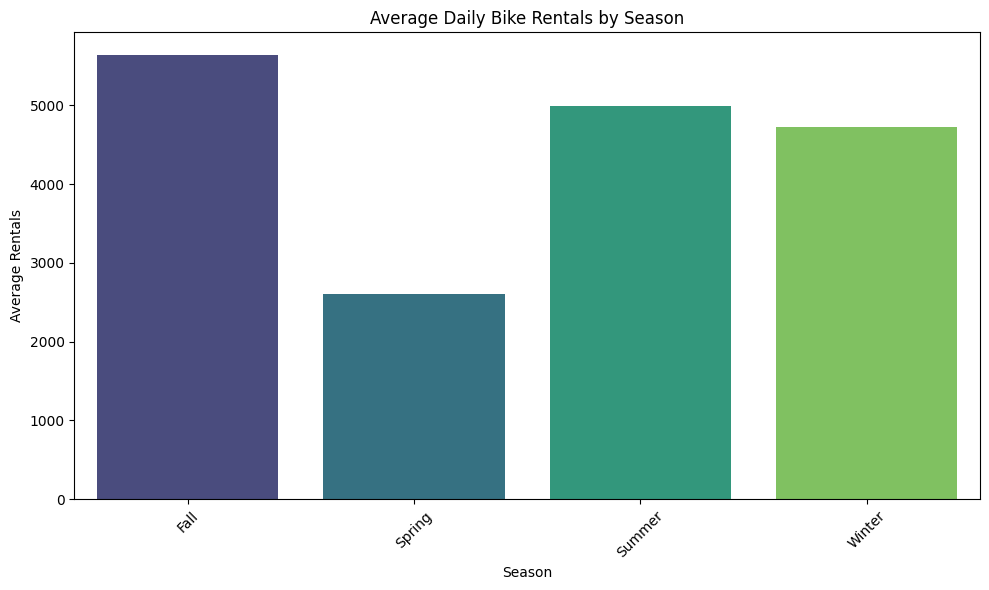

In [18]:
# Explore seasonal patterns
season_day = day_df.groupby('season_cat')['cnt'].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(x='season_cat', y='cnt', data=season_day, palette='viridis')
plt.title('Average Daily Bike Rentals by Season')
plt.xlabel('Season')
plt.ylabel('Average Rentals')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

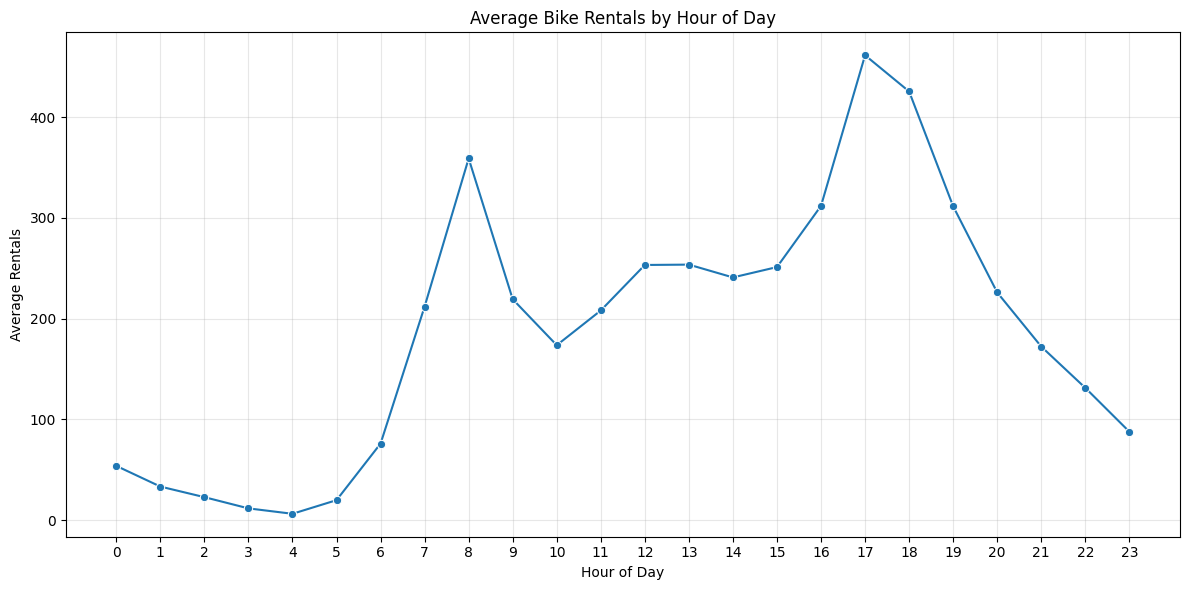

In [19]:
# Explore hourly patterns
hourly_pattern = hour_df.groupby('hr')['cnt'].mean().reset_index()
plt.figure(figsize=(12, 6))
sns.lineplot(x='hr', y='cnt', data=hourly_pattern, marker='o')
plt.title('Average Bike Rentals by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Average Rentals')
plt.xticks(range(0, 24))
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

/var/folders/3z/wmjg52bd7vjcpg3nlf8s4c4m0000gn/T/ipykernel_93206/810162146.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='weather_cat', y='cnt', data=weather_impact, palette='coolwarm')


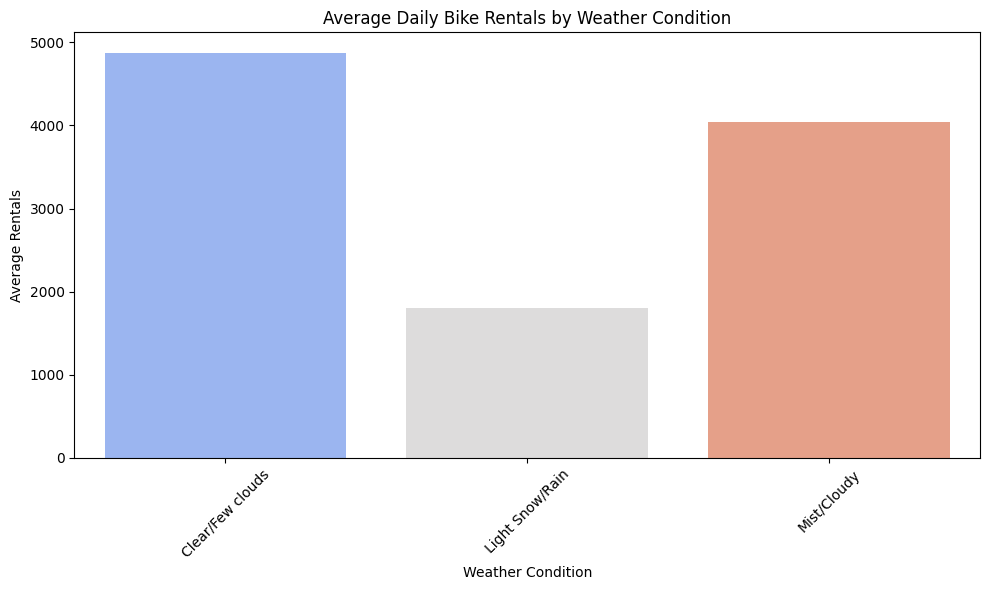

In [20]:
# Weather impact
weather_impact = day_df.groupby('weather_cat')['cnt'].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(x='weather_cat', y='cnt', data=weather_impact, palette='coolwarm')
plt.title('Average Daily Bike Rentals by Weather Condition')
plt.xlabel('Weather Condition')
plt.ylabel('Average Rentals')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# **Insight:**
# * Terdapat pola musiman yang jelas dalam penggunaan sepeda, dengan puncaknya di musim Fall dan Summer
# * Terdapat pola harian yang menunjukkan dua puncak pemakaian pada jam berangkat (8 pagi) dan jam pulang kerja (5-6 sore)
# * Kondisi cuaca sangat mempengaruhi jumlah penyewaan sepeda, dengan penurunan signifikan pada cuaca hujan atau salju

# Visualization & Explanatory Analysis

# Pertanyaan 1: Bagaimana pola penggunaan sepeda berdasarkan waktu (jam, hari, bulan, musim) dan faktor cuaca?

In [21]:
# Pola penggunaan berdasarkan musim dan bulan
plt.figure(figsize=(15, 10))

<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

/var/folders/3z/wmjg52bd7vjcpg3nlf8s4c4m0000gn/T/ipykernel_93206/1398936383.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='season_cat', y='cnt', data=day_df, palette='viridis')


([0, 1, 2, 3],
 [Text(0, 0, 'Spring'),
  Text(1, 0, 'Summer'),
  Text(2, 0, 'Fall'),
  Text(3, 0, 'Winter')])

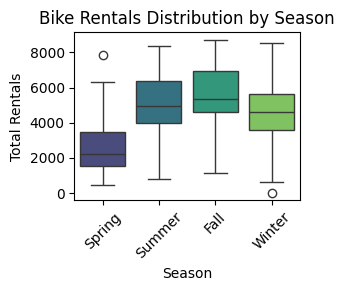

In [22]:
# Subplot 1: Musiman
plt.subplot(2, 2, 1)
sns.boxplot(x='season_cat', y='cnt', data=day_df, palette='viridis')
plt.title('Bike Rentals Distribution by Season')
plt.xlabel('Season')
plt.ylabel('Total Rentals')
plt.xticks(rotation=45)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'January'),
  Text(1, 0, 'February'),
  Text(2, 0, 'March'),
  Text(3, 0, 'April'),
  Text(4, 0, 'May'),
  Text(5, 0, 'June'),
  Text(6, 0, 'July'),
  Text(7, 0, 'August'),
  Text(8, 0, 'September'),
  Text(9, 0, 'October'),
  Text(10, 0, 'November'),
  Text(11, 0, 'December')])

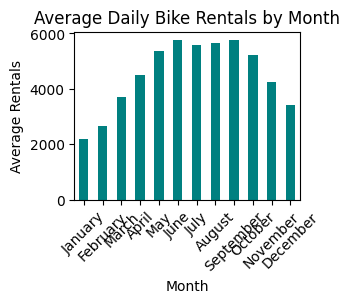

In [23]:
# Subplot 2: Bulanan
monthly_data = day_df.groupby('month_name')['cnt'].mean().reindex(calendar.month_name[1:13])
plt.subplot(2, 2, 2)
monthly_data.plot(kind='bar', color='teal')
plt.title('Average Daily Bike Rentals by Month')
plt.xlabel('Month')
plt.ylabel('Average Rentals')
plt.xticks(rotation=45)

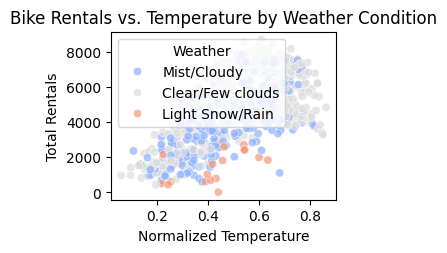

In [24]:
# Subplot 3: Weather and Temperature
plt.subplot(2, 2, 3)
sns.scatterplot(x='temp', y='cnt', hue='weather_cat', data=day_df, palette='coolwarm', alpha=0.7)
plt.title('Bike Rentals vs. Temperature by Weather Condition')
plt.xlabel('Normalized Temperature')
plt.ylabel('Total Rentals')
plt.legend(title='Weather', loc='upper left')

/var/folders/3z/wmjg52bd7vjcpg3nlf8s4c4m0000gn/T/ipykernel_93206/1075640810.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='is_weekend', y='cnt', data=day_type, palette='Set2')


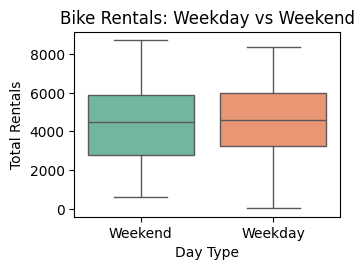

In [25]:
# Subplot 4: Weekday vs Weekend
day_type = day_df.copy()
day_type['is_weekend'] = day_type['weekday'].apply(lambda x: 'Weekend' if x in [0, 6] else 'Weekday')
plt.subplot(2, 2, 4)
sns.boxplot(x='is_weekend', y='cnt', data=day_type, palette='Set2')
plt.title('Bike Rentals: Weekday vs Weekend')
plt.xlabel('Day Type')
plt.ylabel('Total Rentals')

plt.tight_layout()
plt.show()

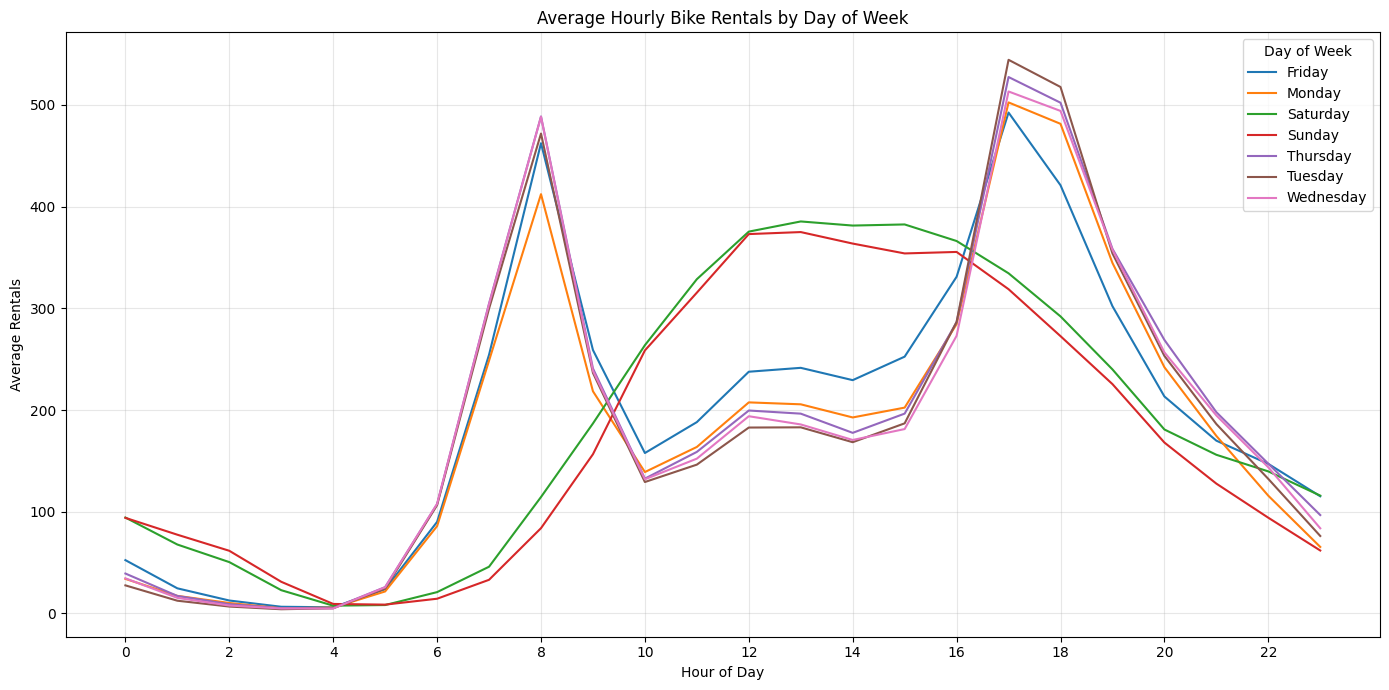

In [26]:
# Hourly patterns by weekday
plt.figure(figsize=(14, 7))
hourly_weekday = hour_df.groupby(['weekday_name', 'hr'])['cnt'].mean().reset_index()
sns.lineplot(x='hr', y='cnt', hue='weekday_name', data=hourly_weekday, palette='tab10')
plt.title('Average Hourly Bike Rentals by Day of Week')
plt.xlabel('Hour of Day')
plt.ylabel('Average Rentals')
plt.xticks(range(0, 24, 2))
plt.legend(title='Day of Week')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

/var/folders/3z/wmjg52bd7vjcpg3nlf8s4c4m0000gn/T/ipykernel_93206/3480656417.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='temp', y='cnt', hue='weather_cat', data=hour_df, ci=None)


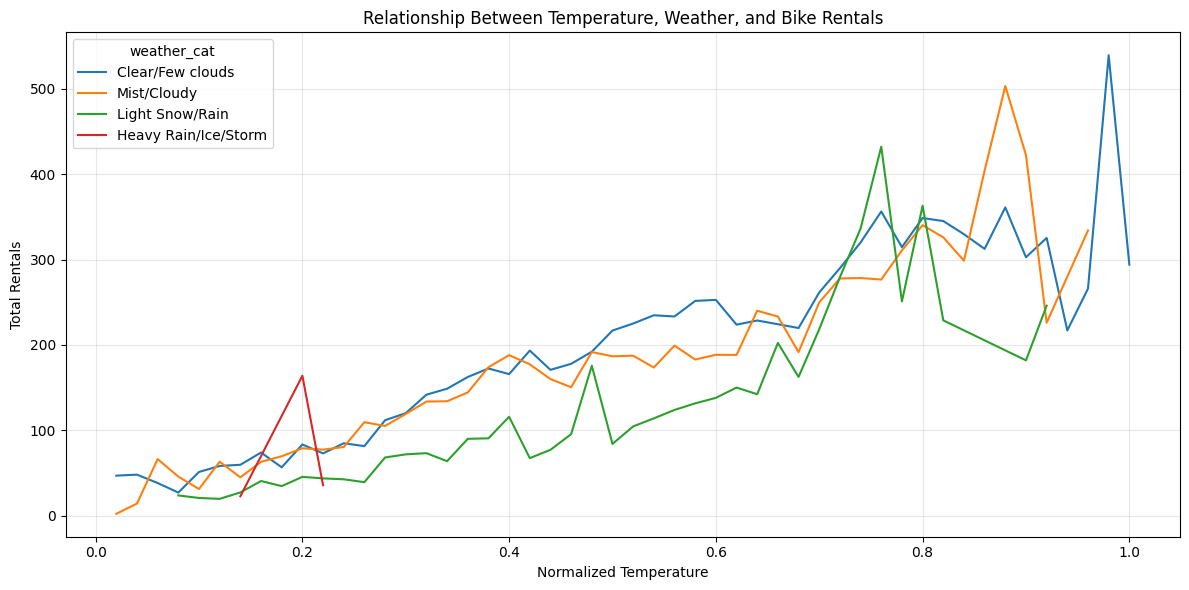

In [27]:
# Weather and temperature relationship
plt.figure(figsize=(12, 6))
sns.lineplot(x='temp', y='cnt', hue='weather_cat', data=hour_df, ci=None)
plt.title('Relationship Between Temperature, Weather, and Bike Rentals')
plt.xlabel('Normalized Temperature')
plt.ylabel('Total Rentals')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Pertanyaan 2: Apa perbedaan karakteristik antara pengguna casual dan registered dalam menggunakan layanan bike sharing?

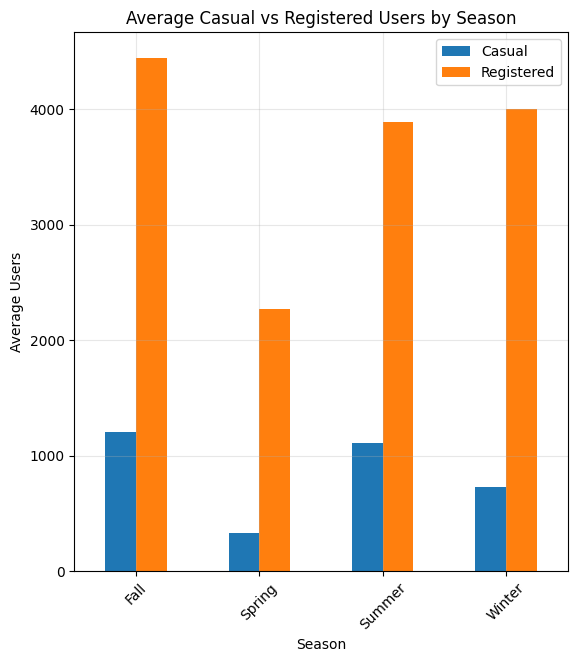

In [28]:
# Compare casual vs registered by season
plt.figure(figsize=(14, 7))
plt.subplot(1, 2, 1)
seasonal_casual = day_df.groupby('season_cat')['casual'].mean()
seasonal_registered = day_df.groupby('season_cat')['registered'].mean()
seasonal_data = pd.DataFrame({'Casual': seasonal_casual, 'Registered': seasonal_registered})
seasonal_data.plot(kind='bar', ax=plt.gca())
plt.title('Average Casual vs Registered Users by Season')
plt.xlabel('Season')
plt.ylabel('Average Users')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)

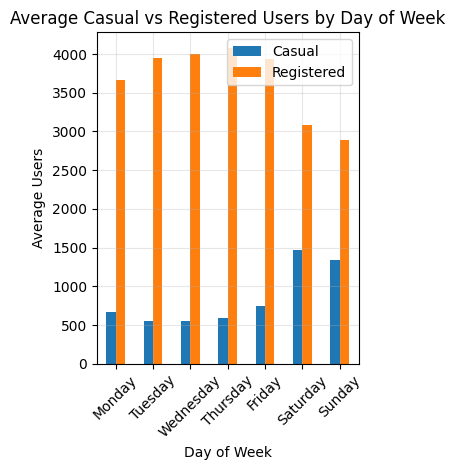

In [29]:
# Compare casual vs registered by day of week
plt.subplot(1, 2, 2)
weekday_casual = day_df.groupby('weekday_name')['casual'].mean()
weekday_registered = day_df.groupby('weekday_name')['registered'].mean()
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekday_data = pd.DataFrame({'Casual': weekday_casual, 'Registered': weekday_registered}).reindex(days_order)
weekday_data.plot(kind='bar', ax=plt.gca())
plt.title('Average Casual vs Registered Users by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Average Users')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

<Figure size 1200x700 with 0 Axes>

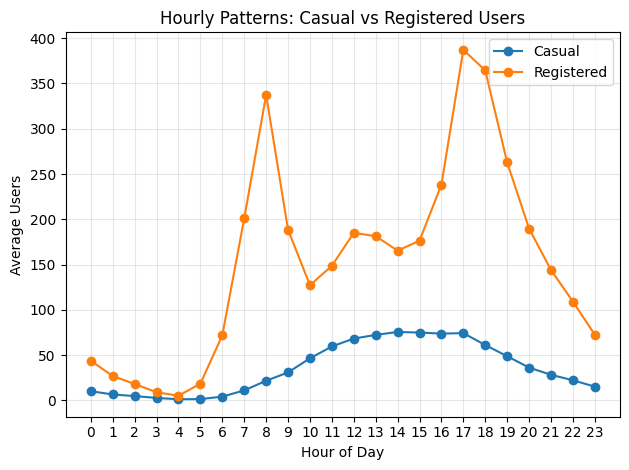

In [30]:
# Hourly patterns: casual vs registered
plt.figure(figsize=(12, 7))
hourly_casual = hour_df.groupby('hr')['casual'].mean()
hourly_registered = hour_df.groupby('hr')['registered'].mean()
hourly_users = pd.DataFrame({'Casual': hourly_casual, 'Registered': hourly_registered})
hourly_users.plot(kind='line', marker='o')
plt.title('Hourly Patterns: Casual vs Registered Users')
plt.xlabel('Hour of Day')
plt.ylabel('Average Users')
plt.xticks(range(0, 24))
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

In [31]:
# Weekend vs Weekday comparison for both user types
plt.figure(figsize=(14, 7))
# Create a new column for day type
hour_df['day_type'] = hour_df['weekday'].apply(lambda x: 'Weekend' if x in [0, 6] else 'Weekday')

<Figure size 1400x700 with 0 Axes>

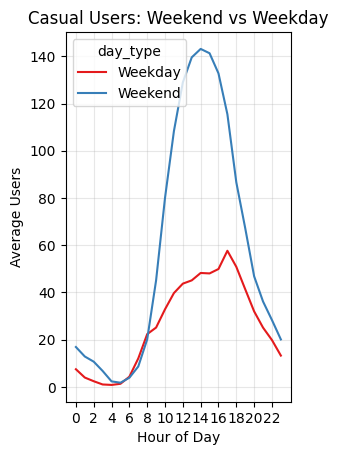

In [32]:
# Plot for casual users
plt.subplot(1, 2, 1)
weekday_hour_casual = hour_df.groupby(['day_type', 'hr'])['casual'].mean().reset_index()
sns.lineplot(x='hr', y='casual', hue='day_type', data=weekday_hour_casual, palette='Set1')
plt.title('Casual Users: Weekend vs Weekday')
plt.xlabel('Hour of Day')
plt.ylabel('Average Users')
plt.xticks(range(0, 24, 2))
plt.grid(True, alpha=0.3)

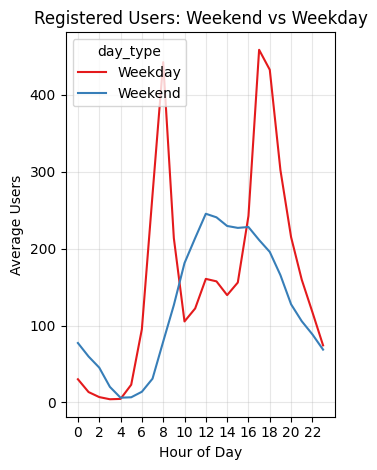

In [33]:
# Plot for registered users
plt.subplot(1, 2, 2)
weekday_hour_registered = hour_df.groupby(['day_type', 'hr'])['registered'].mean().reset_index()
sns.lineplot(x='hr', y='registered', hue='day_type', data=weekday_hour_registered, palette='Set1')
plt.title('Registered Users: Weekend vs Weekday')
plt.xlabel('Hour of Day')
plt.ylabel('Average Users')
plt.xticks(range(0, 24, 2))
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

<Figure size 1200x600 with 0 Axes>

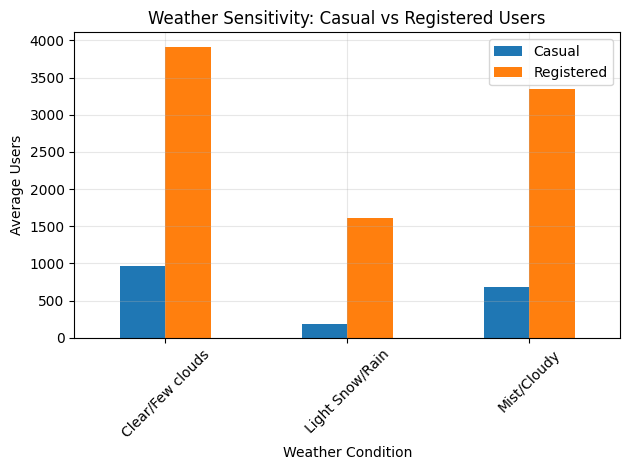

In [34]:
# Weather sensitivity comparison
plt.figure(figsize=(12, 6))
weather_casual = day_df.groupby('weather_cat')['casual'].mean()
weather_registered = day_df.groupby('weather_cat')['registered'].mean()
weather_users = pd.DataFrame({'Casual': weather_casual, 'Registered': weather_registered})
weather_users.plot(kind='bar')
plt.title('Weather Sensitivity: Casual vs Registered Users')
plt.xlabel('Weather Condition')
plt.ylabel('Average Users')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# **Insight:**
# * Pengguna registered menunjukkan pola penggunaan sepeda yang konsisten pada hari kerja, dengan puncak pada jam berangkat dan pulang kerja
# * Pengguna casual lebih banyak pada akhir pekan dan memiliki distribusi yang lebih merata sepanjang hari
# * Pengguna casual lebih sensitif terhadap kondisi cuaca dibandingkan pengguna registered
# * Musim panas dan musim gugur adalah waktu puncak bagi kedua jenis pengguna, namun pengguna casual menunjukkan kenaikan yang lebih signifikan pada musim-musim tersebut

# Analisis Lanjutan (Opsional)
# Clustering berbasis pola penggunaan

In [35]:
# Preparing data for clustering
hour_pivot = hour_df.pivot_table(
    index='dteday', 
    columns='hr', 
    values='cnt', 
    aggfunc='sum'
).fillna(0)

In [42]:
# Install scikit-learn if not already installed
%pip install scikit-learn

# Normalize the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
hour_pivot_scaled = scaler.fit_transform(hour_pivot)

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 11.1 MB 4.6 MB/s eta 0:00:01
     |████████████████████████████████| 30.3 MB 2.1 MB/s eta 0:00:01
     |████████████████████████████████| 301 kB 2.1 MB/s eta 0:00:01
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [43]:
# K-means clustering
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(hour_pivot_scaled)

In [44]:
# Add cluster information back to the dataframe
hour_pivot['cluster'] = clusters
day_with_cluster = day_df.copy()
day_with_cluster['cluster'] = day_with_cluster['dteday'].map(
    hour_pivot['cluster'].to_dict()
)

In [45]:
# Analyze clusters
cluster_analysis = day_with_cluster.groupby('cluster').agg({
    'season_cat': lambda x: x.value_counts().index[0],
    'weather_cat': lambda x: x.value_counts().index[0],
    'temp': 'mean',
    'hum': 'mean',
    'windspeed': 'mean',
    'casual': 'mean',
    'registered': 'mean',
    'cnt': 'mean',
    'workingday': lambda x: x.mean() > 0.5,
    'weekday_name': lambda x: x.value_counts().index[0]
}).reset_index()

In [46]:
# Visualize clusters
plt.figure(figsize=(14, 10))

<Figure size 1400x1000 with 0 Axes>

<Figure size 1400x1000 with 0 Axes>

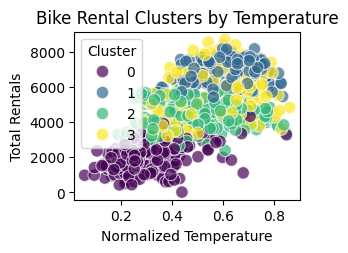

In [47]:
# Plot 1: Clusters by season and temperature
plt.subplot(2, 2, 1)
sns.scatterplot(
    x='temp', 
    y='cnt', 
    hue='cluster', 
    data=day_with_cluster, 
    palette='viridis', 
    s=80, 
    alpha=0.7
)
plt.title('Bike Rental Clusters by Temperature')
plt.xlabel('Normalized Temperature')
plt.ylabel('Total Rentals')
plt.legend(title='Cluster')


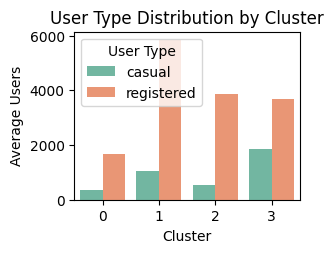

In [48]:
# Plot 2: User type ratio by cluster
plt.subplot(2, 2, 2)
cluster_user_ratio = cluster_analysis[['cluster', 'casual', 'registered']].melt(
    id_vars='cluster', 
    value_vars=['casual', 'registered'],
    var_name='user_type',
    value_name='count'
)
sns.barplot(x='cluster', y='count', hue='user_type', data=cluster_user_ratio, palette='Set2')
plt.title('User Type Distribution by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Average Users')
plt.legend(title='User Type')

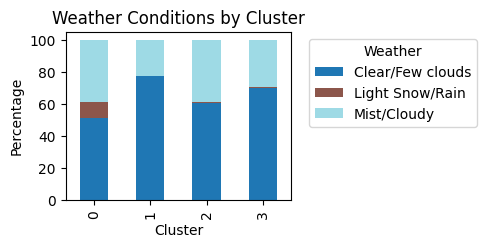

In [49]:
# Plot 3: Weather conditions by cluster
plt.subplot(2, 2, 3)
cluster_weather = day_with_cluster.groupby(['cluster', 'weather_cat']).size().reset_index(name='count')
cluster_weather_pivot = cluster_weather.pivot(index='cluster', columns='weather_cat', values='count').fillna(0)
cluster_weather_pivot = cluster_weather_pivot.div(cluster_weather_pivot.sum(axis=1), axis=0) * 100
cluster_weather_pivot.plot(kind='bar', stacked=True, ax=plt.gca(), colormap='tab20')
plt.title('Weather Conditions by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Percentage')
plt.legend(title='Weather', bbox_to_anchor=(1.05, 1), loc='upper left')

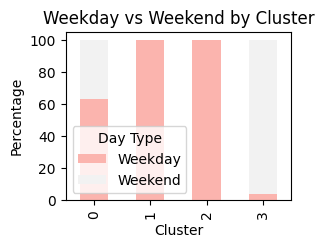

In [50]:
# Plot 4: Workday vs weekend by cluster
plt.subplot(2, 2, 4)
cluster_day_type = day_with_cluster.copy()
cluster_day_type['is_weekend'] = cluster_day_type['weekday'].apply(lambda x: 'Weekend' if x in [0, 6] else 'Weekday')
cluster_day_dist = cluster_day_type.groupby(['cluster', 'is_weekend']).size().reset_index(name='count')
cluster_day_pivot = cluster_day_dist.pivot(index='cluster', columns='is_weekend', values='count').fillna(0)
cluster_day_pivot = cluster_day_pivot.div(cluster_day_pivot.sum(axis=1), axis=0) * 100
cluster_day_pivot.plot(kind='bar', stacked=True, ax=plt.gca(), colormap='Pastel1')
plt.title('Weekday vs Weekend by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Percentage')
plt.legend(title='Day Type')

In [51]:
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

# Conclusion

# * Pola penggunaan sepeda sangat dipengaruhi oleh faktor waktu dan cuaca:
#   - Terdapat dua puncak penggunaan pada hari kerja: pagi hari (8-9) dan sore hari (17-18), yang sangat berkaitan dengan jam berangkat dan pulang kerja
#   - Musim panas dan musim gugur adalah periode dengan tingkat penggunaan tertinggi
#   - Kondisi cuaca yang buruk (hujan, salju) sangat mengurangi tingkat penggunaan sepeda
#   - Temperatur memiliki korelasi positif dengan jumlah penyewaan sepeda

# * Terdapat perbedaan karakteristik yang jelas antara pengguna casual dan registered:
#   - Pengguna registered menunjukkan pola penggunaan yang lebih konsisten dan berorientasi pada commuting (perjalanan kerja)
#   - Pengguna casual lebih banyak pada akhir pekan dan memiliki distribusi penggunaan yang lebih merata sepanjang hari
#   - Pengguna casual lebih sensitif terhadap perubahan cuaca dan musim dibandingkan pengguna registered
#   - Strategi pemasaran dan layanan dapat dioptimalkan berdasarkan karakteristik kedua jenis pengguna ini